In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 80%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 80%; }a
</style>
"""))

In [2]:
# import package pandas, geopandas, plots

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os
import seaborn as sns
import matplotlib.pyplot as plt 

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString, Polygon, MultiPoint
from shapely import wkt


import contextily as cx  # import street map
#from pyproj import CRS

### 2.1  Subir la base de datos de las manzanas en formate GeodataFrame. Crear los centroides de las manzanas 

In [3]:
# SELECIONAMOS LOS DISTRITOS DE LA CARTOGRAFIA 

district = ['ATE','BARRANCO','BREÑA', 'CALLAO', 'CARABAYLLO','CHORRILLOS','COMAS','EL_AGUSTINO','INDEPENDENCIA',
           'JESUS_MARIA','LA_MOLINA_LIMA','LA_VICTORIA','LIMA','LINCE','LOS_OLIVOS_LIMA','MAGDALENA_DEL_MAR',
           'MIRAFLORES','PUEBLO_LIBRE','PUENTE_PIEDRA', 'RIMAC_LIMA','SAN_BORJA','SAN_ISIDRO','SAN_JUAN_DE_LURIGANCHO','SAN_JUAN_DE_MIRAFLORES','SAN_LUIS',
            'SAN_MARTIN_DE_PORRES','SAN_MIGUEL','SANTA_ANITA','SURCO','VILLA_EL_SALVADOR','VILLA_MARIA_DEL_TRIUNFO']


In [4]:
#datos  = gpd.read_file(r"..\Trabajo_final\5_Informacion_Cartografica-Shape\LIMA\LIMA.shp")

datos = r"../../data/Trabajo_final/5_Informacion_Cartografica-Shape/"
 

i = 0

for j in district:
        i = i + 1
        globals()[f'manzana{i}']  = gpd.read_file(f'{datos}{j}/{j}.shp')
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'][['Mz','geometry','UBIGEO']]
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'].rename(columns = {"Mz":"id_manzana"})

        
       
        
maps = manzana1.copy()

for k in range(2,i+1):
    maps = maps.append(globals()[f'manzana{k}'] , ignore_index=True)

C:\Users\lider\AppData\Local\Temp\ipykernel_10972\1583948384.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maps = maps.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\lider\AppData\Local\Temp\ipykernel_10972\1583948384.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maps = maps.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\lider\AppData\Local\Temp\ipykernel_10972\1583948384.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maps = maps.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\lider\AppData\Local\Temp\ipykernel_10972\1583948384.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [5]:
maps.crs # nos informa que el EPSG es 4326 lo conbertimos a bidimensional epsg = 24891

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
maps = gpd.GeoDataFrame(maps, geometry = "geometry", ) # lo transformamos a geodataframe
maps

,id_manzana,geometry,UBIGEO
0,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103
1,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103
2,150103000101800006,"POLYGON ((-76.91978 -12.04229, -76.91966 -12.0...",150103
3,150103000102900018,"POLYGON ((-76.92292 -12.02466, -76.92240 -12.0...",150103
4,150103000103800056,"POLYGON ((-76.89258 -12.03403, -76.89291 -12.0...",150103
...,...,...,...
87854,150143000103400036D,"POLYGON ((-76.93692 -12.16901, -76.93692 -12.1...",150143
87855,150143000104600043L,"POLYGON ((-76.91812 -12.16638, -76.91813 -12.1...",150143
87856,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",150143
87857,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143


In [8]:
mapa_a= gpd.GeoDataFrame(maps, geometry='geometry',) # realizamos otra geodataframe para poder ubicar los centroides 
mapa_a

,id_manzana,geometry,UBIGEO
0,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103
1,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103
2,150103000101800006,"POLYGON ((-76.91978 -12.04229, -76.91966 -12.0...",150103
3,150103000102900018,"POLYGON ((-76.92292 -12.02466, -76.92240 -12.0...",150103
4,150103000103800056,"POLYGON ((-76.89258 -12.03403, -76.89291 -12.0...",150103
...,...,...,...
87854,150143000103400036D,"POLYGON ((-76.93692 -12.16901, -76.93692 -12.1...",150143
87855,150143000104600043L,"POLYGON ((-76.91812 -12.16638, -76.91813 -12.1...",150143
87856,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",150143
87857,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143


In [9]:

mapa_a['centroid'] = mapa_a['geometry'].centroid

C:\Users\lider\AppData\Local\Temp\ipykernel_10972\2359515721.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mapa_a['centroid'] = mapa_a['geometry'].centroid


In [10]:
mapa_a['centroid'] # Estos son los centroides de cada manzana 

0        POINT (-76.82193 -12.03305)
1        POINT (-76.89135 -12.02558)
2        POINT (-76.91951 -12.04244)
3        POINT (-76.92265 -12.02471)
4        POINT (-76.89272 -12.03388)
                    ...             
87854    POINT (-76.93702 -12.16916)
87855    POINT (-76.91812 -12.16663)
87856    POINT (-76.91409 -12.20713)
87857    POINT (-76.90899 -12.22471)
87858    POINT (-76.91232 -12.22224)
Name: centroid, Length: 87859, dtype: geometry

In [12]:
mapa_a = maps.astype({'UBIGEO': 'int'}) ### realizamos este comando para determinar el int32 o int64


### subimos la base de dato de salud mental

In [13]:
 # se toma  el excel de salud mental para concer las ubicaciones de las manzanas 
salud_m = pd.read_excel(r'../../data/Trabajo_final/Salud_mental_peru.xls')
salud_m 

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.00095
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.9482472
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.02954497
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.0456523
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.9644885
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.01337496


In [14]:
salud_m2 = gpd.GeoDataFrame(salud_m, geometry=gpd.points_from_xy( salud_m.long_original, salud_m.lat_original ) ) # Determinamos la GeodataFrame de salud mental 
salud_m2

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original,geometry
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.00095,POINT (-77.00095 -12.01728)
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.9482472,POINT (-76.94825 -12.13666)
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385,POINT (-76.99939 -12.10766)
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597,POINT (-77.00560 -12.06221)
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523,POINT (-77.03552 -12.06635)
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147,POINT (-76.82315 -12.33377)
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.02954497,POINT (-77.02954 -12.02942)
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.0456523,POINT (-77.04565 -11.93451)
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.9644885,POINT (-76.96449 -12.18609)
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.01337496,POINT (-77.01337 -12.07142)


In [15]:
mapa_b= mapa_a.merge( salud_m2, how="inner", on = 'UBIGEO') # Unimos lo mapas que compartir misma variable, tal es el caso de UBIGEO 
mapa_b

,id_manzana,geometry_x,UBIGEO,centroid,Institución,Departamento,Provincia,Distrito,lat_original,long_original,geometry_y
0,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,POINT (-76.82193 -12.03305),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674)
1,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,POINT (-76.82193 -12.03305),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581)
2,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,POINT (-76.89135 -12.02558),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674)
3,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,POINT (-76.89135 -12.02558),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581)
4,150103000101800006,"POLYGON ((-76.91978 -12.04229, -76.91966 -12.0...",150103,POINT (-76.91951 -12.04244),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674)
...,...,...,...,...,...,...,...,...,...,...,...
141096,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",150143,POINT (-76.91409 -12.20713),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157)
141097,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,POINT (-76.90899 -12.22471),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666)
141098,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,POINT (-76.90899 -12.22471),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157)
141099,150143000108000045,"POLYGON ((-76.91243 -12.22237, -76.91248 -12.2...",150143,POINT (-76.91232 -12.22224),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666)


### 2.2 Crear una variable dummy llamado Treatment que toma el valor de 1 si el centroide de la manzana se ubica a menos de 1 km de algun centro de salud mental.

In [16]:
### buscamos la distancia entre de las manzanas  y centros de salud publica

#para ello se crear dos variables que adjuntan sus distancias 

punto_A= gpd.GeoDataFrame({'geometry': mapa_b['centroid']}, )
punto_B= gpd.GeoDataFrame({'geometry': mapa_b['geometry_y']}, )
punto_A # lugar de las  manzanas 

,geometry
0,POINT (-76.82193 -12.03305)
1,POINT (-76.82193 -12.03305)
2,POINT (-76.89135 -12.02558)
3,POINT (-76.89135 -12.02558)
4,POINT (-76.91951 -12.04244)
...,...
141096,POINT (-76.91409 -12.20713)
141097,POINT (-76.90899 -12.22471)
141098,POINT (-76.90899 -12.22471)
141099,POINT (-76.91232 -12.22224)


In [17]:
punto_B # lugar de centros de salud 

,geometry
0,POINT (-76.82504 -12.01674)
1,POINT (-76.95287 -12.05581)
2,POINT (-76.82504 -12.01674)
3,POINT (-76.95287 -12.05581)
4,POINT (-76.82504 -12.01674)
...,...
141096,POINT (-76.93821 -12.16157)
141097,POINT (-76.94825 -12.13666)
141098,POINT (-76.93821 -12.16157)
141099,POINT (-76.94825 -12.13666)


In [18]:
mapa_b["Distancia"] = punto_B.apply(lambda x: punto_A.distance(x))
mapa_b


C:\Users\lider\AppData\Local\Temp\ipykernel_10972\1804563756.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mapa_b["Distancia"] = punto_B.apply(lambda x: punto_A.distance(x))
C:\Users\lider\AppData\Local\Temp\ipykernel_10972\1804563756.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  mapa_b["Distancia"] = punto_B.apply(lambda x: punto_A.distance(x))


,id_manzana,geometry_x,UBIGEO,centroid,Institución,Departamento,Provincia,Distrito,lat_original,long_original,geometry_y,Distancia
0,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,POINT (-76.82193 -12.03305),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.016604
1,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,POINT (-76.82193 -12.03305),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581),0.132905
2,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,POINT (-76.89135 -12.02558),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.066899
3,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,POINT (-76.89135 -12.02558),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581),0.068544
4,150103000101800006,"POLYGON ((-76.91978 -12.04229, -76.91966 -12.0...",150103,POINT (-76.91951 -12.04244),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.097903
...,...,...,...,...,...,...,...,...,...,...,...,...
141096,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",150143,POINT (-76.91409 -12.20713),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.051543
141097,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,POINT (-76.90899 -12.22471),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.096411
141098,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,POINT (-76.90899 -12.22471),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.069575
141099,150143000108000045,"POLYGON ((-76.91243 -12.22237, -76.91248 -12.2...",150143,POINT (-76.91232 -12.22224),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.092819


In [19]:
#Ahora, creamos la dummy que nos afirme que manzana esta a menos de 1km de distancia del centro de salud

mapa_b['Treatment'] = np.where(mapa_b['Distancia'] < 1, 1, 0)

mapa_b

,id_manzana,geometry_x,UBIGEO,centroid,Institución,Departamento,Provincia,Distrito,lat_original,long_original,geometry_y,Distancia,Treatment
0,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,POINT (-76.82193 -12.03305),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.016604,1
1,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,POINT (-76.82193 -12.03305),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581),0.132905,1
2,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,POINT (-76.89135 -12.02558),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.066899,1
3,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,POINT (-76.89135 -12.02558),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581),0.068544,1
4,150103000101800006,"POLYGON ((-76.91978 -12.04229, -76.91966 -12.0...",150103,POINT (-76.91951 -12.04244),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.097903,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141096,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",150143,POINT (-76.91409 -12.20713),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.051543,1
141097,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,POINT (-76.90899 -12.22471),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.096411,1
141098,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,POINT (-76.90899 -12.22471),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.069575,1
141099,150143000108000045,"POLYGON ((-76.91243 -12.22237, -76.91248 -12.2...",150143,POINT (-76.91232 -12.22224),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.092819,1


### 2.3 Crear una dummy llamado Control que toma el valor de 1 si la manzana se ubica entre 1 a 2 km del centro de salud mental.

In [20]:
mapa_b['Control'] = np.where((mapa_b['Distancia'] <= 2) & (mapa_b['Distancia'] >= 1), 1, 0)
mapa_b

,id_manzana,geometry_x,UBIGEO,centroid,Institución,Departamento,Provincia,Distrito,lat_original,long_original,geometry_y,Distancia,Treatment,Control
0,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,POINT (-76.82193 -12.03305),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.016604,1,0
1,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,POINT (-76.82193 -12.03305),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581),0.132905,1,0
2,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,POINT (-76.89135 -12.02558),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.066899,1,0
3,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,POINT (-76.89135 -12.02558),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581),0.068544,1,0
4,150103000101800006,"POLYGON ((-76.91978 -12.04229, -76.91966 -12.0...",150103,POINT (-76.91951 -12.04244),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.097903,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141096,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",150143,POINT (-76.91409 -12.20713),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.051543,1,0
141097,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,POINT (-76.90899 -12.22471),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.096411,1,0
141098,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,POINT (-76.90899 -12.22471),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.069575,1,0
141099,150143000108000045,"POLYGON ((-76.91243 -12.22237, -76.91248 -12.2...",150143,POINT (-76.91232 -12.22224),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.092819,1,0


### 2.4 Grafique las manzanas treatment en color rojo y en azul las manzanas de control. Mientras de color blanco o neutral, las manzanas que no son control o treatment. Usar como fondo de fondo de la imagen a Google maps. A˜nada una leyenda al gr´afico2 y el siguiente titulo (Mental Health Center - treatment and control). Use hexbin para sombrear las manzanas tratadas, controles y neutrales.

TypeError: 'value' must be an instance of str or bytes, not a float

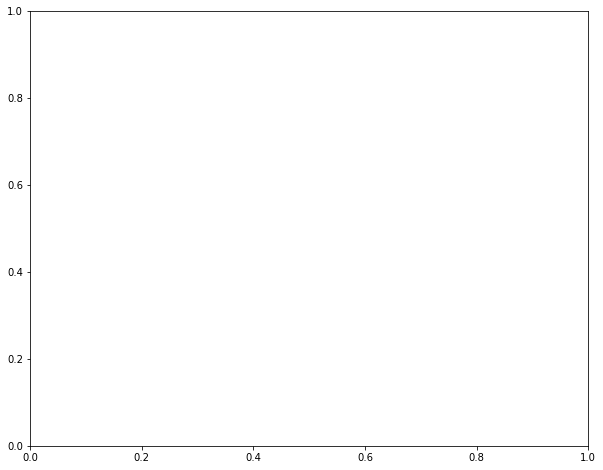

In [21]:
f, ax = plt.subplots(1, figsize=(10,8))

hb = ax.hexbin(mapa_b.lat_original, mapa_b.long_original, C = mapa_b.Distrito, gridsize=35, alpha=0.65, linewidths = 0.5,cmap='Blues')

plt.colorbar(hb, shrink=0.7,anchor=(0, 0.5),label='manzana level(%)', ticks=np.linspace(mapa_b["var8_2017"].quantile(0.25),
                                                                                          mapa_b["var8_2017"].quantile(0.95),4), extend = "both")
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.OpenStreetMap.Mapnik, zoom = 12)


plt.xticks([])
plt.yticks([])
plt.title('%Incomplete Higher Centros de salud a menos de 1km de ditancia')
plt.legend(loc='upper right',frameon=True, bbox_to_anchor=(0.99, 1), prop={'size': 6.5})